In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

In [3]:
import pandas as pd
df_train = pd.read_csv('train-smoking.csv')
df_test = pd.read_csv('test-smoking.csv')

In [4]:
df_train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [8]:
df_train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [10]:
#kiem tra tinh bat thuong cua du lieu
df_train.shape

(159256, 24)

In [11]:
df_test.shape

(106171, 23)

In [13]:
df_train['bmi'] = df_train['weight(kg)'] / pow(df_train['height(cm)']/100,2)
df_test['bmi'] = df_test['weight(kg)'] / pow(df_test['height(cm)']/100,2)

In [14]:
df_train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,75,16.5,1,1.0,22,25,27,0,1,22.038567
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,126,16.2,1,1.1,27,23,37,1,0,23.875115
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,93,17.4,1,0.8,27,31,53,0,1,25.951557
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,102,15.9,1,1.0,20,27,30,1,0,29.320988
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,93,15.4,1,0.8,19,13,17,0,1,22.038567


In [15]:
#how many percents of people over 50 have dental caries?
fileSelect = df_train.loc[df_train.age >= 50]['dental caries'].value_counts()
dataT = df_train['dental caries'].value_counts()
(fileSelect/dataT)*100

dental caries
0    38.133788
1    24.936572
Name: count, dtype: float64

In [20]:
num_of_cholesterols = df_train.loc[df_train.age >= 50].Cholesterol.value_counts()
len(num_of_cholesterols)

214

In [21]:
df_train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365,24.452825
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063,3.368651
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,11.718750
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,22.222222
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,24.221453
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000,26.159334
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000,45.785640


In [22]:
df_test.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,212341.000000,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,1.024216,1.023980,122.475403,...,55.922286,114.597404,14.793354,1.072798,0.892463,25.559616,26.565427,36.086888,0.195458,24.458544
std,30649.072052,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,0.153719,0.152988,12.765542,...,14.000552,26.943401,1.434296,0.340818,0.179927,9.504442,17.944195,30.928138,0.396555,3.361906
min,159256.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,18.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,10.380623
25%,185798.500000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,22.222222
50%,212341.000000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,24.221453
75%,238883.500000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000,26.159334
max,265426.000000,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,...,148.000000,1220.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,48.888889


In [23]:
# define features
features_num = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
                'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
                'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'bmi']

features_cat = ['hearing(left)', 'hearing(right)', 'dental caries']

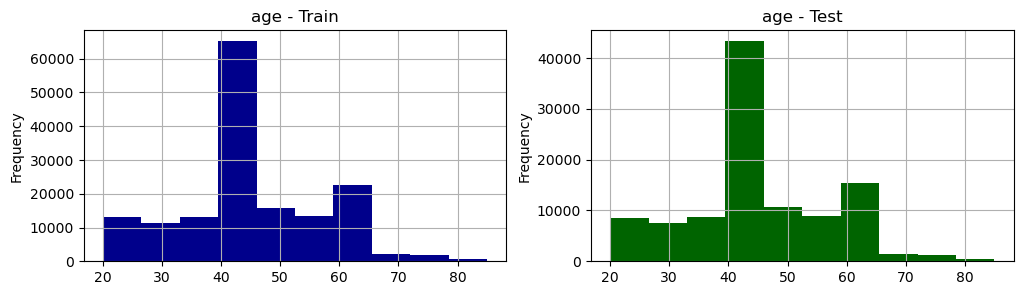

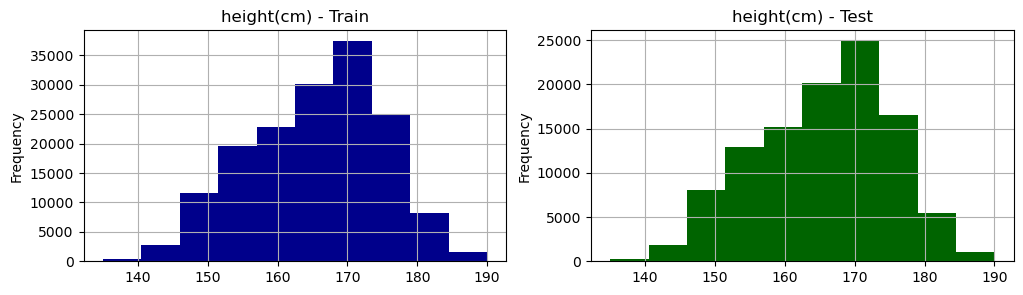

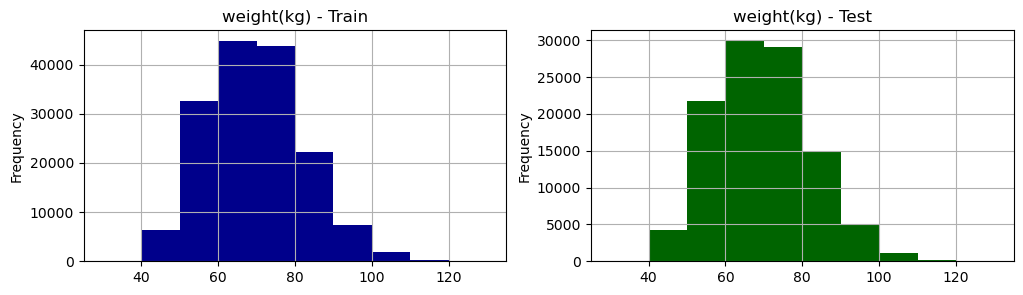

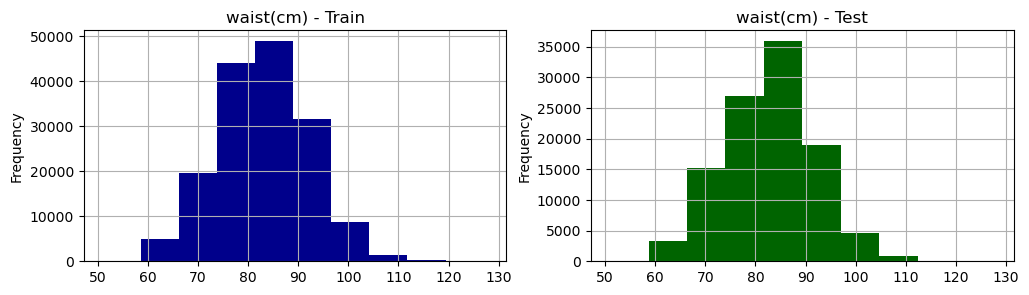

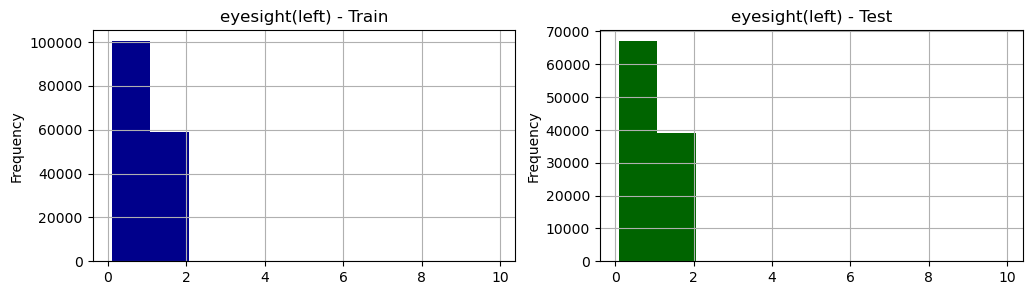

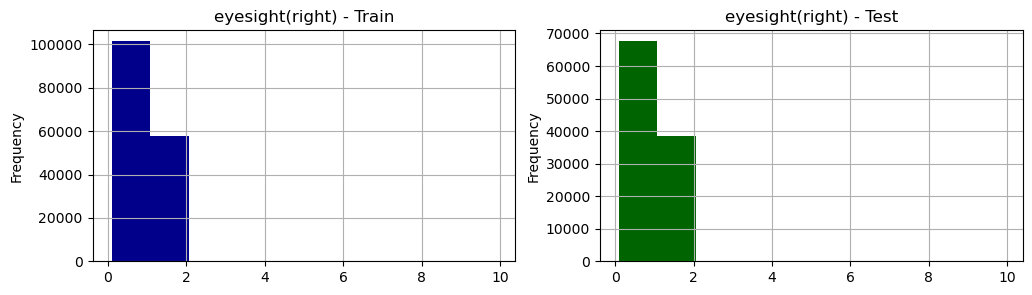

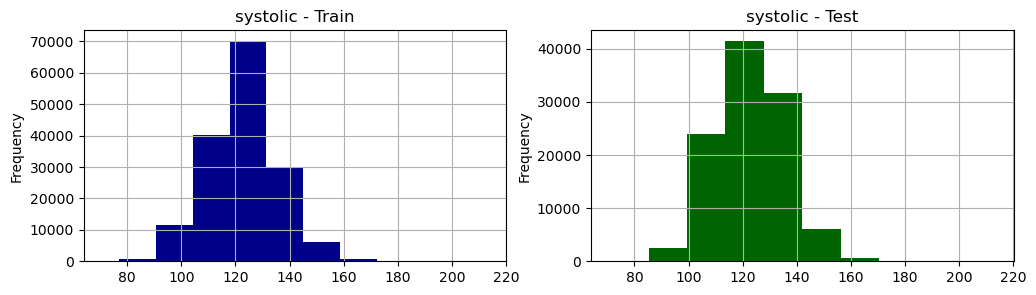

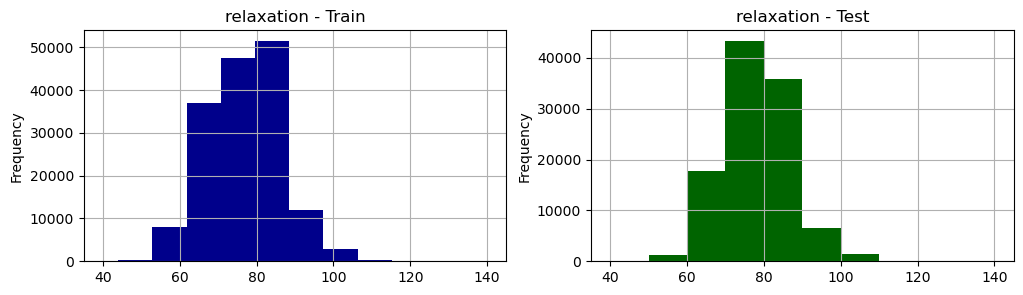

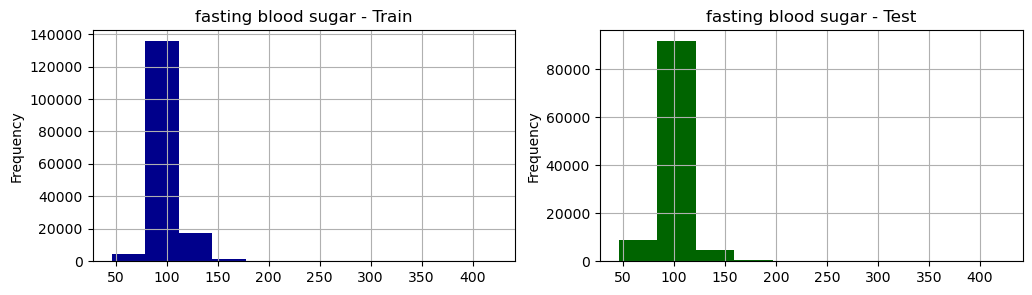

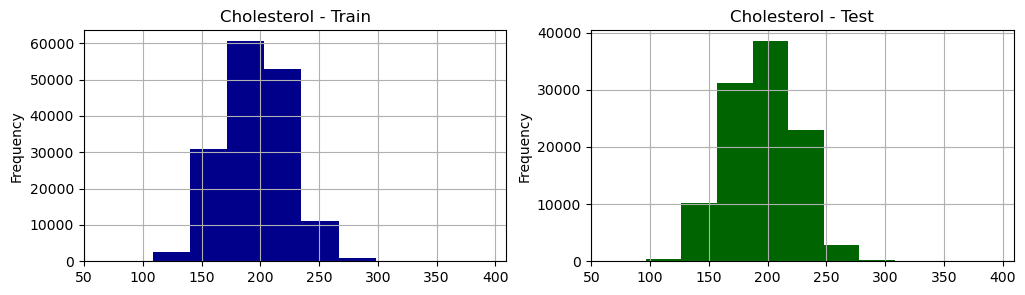

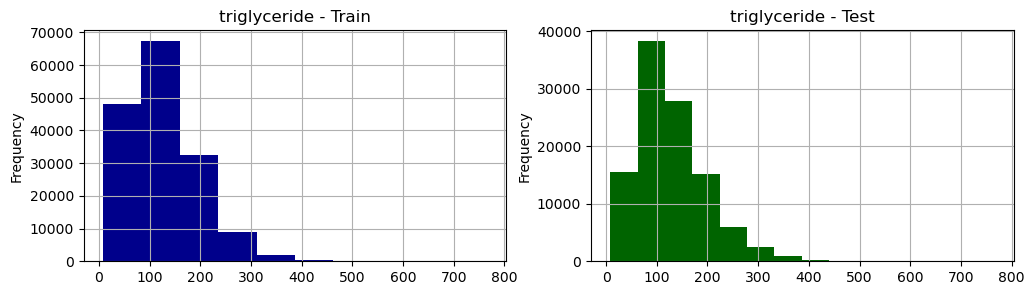

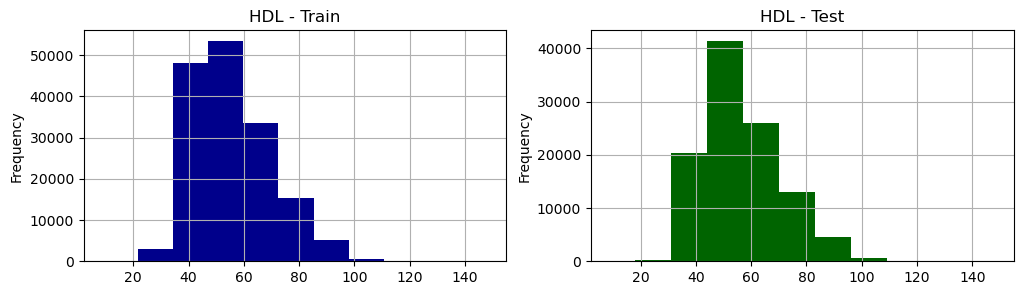

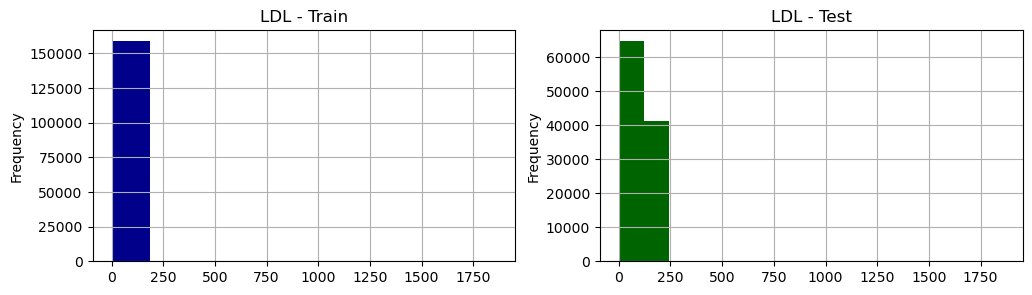

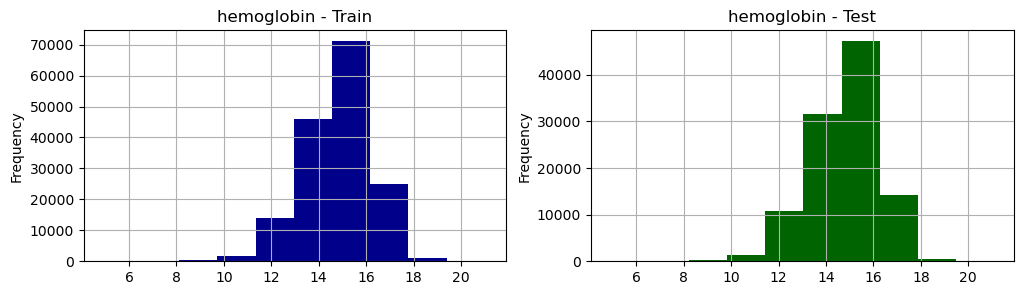

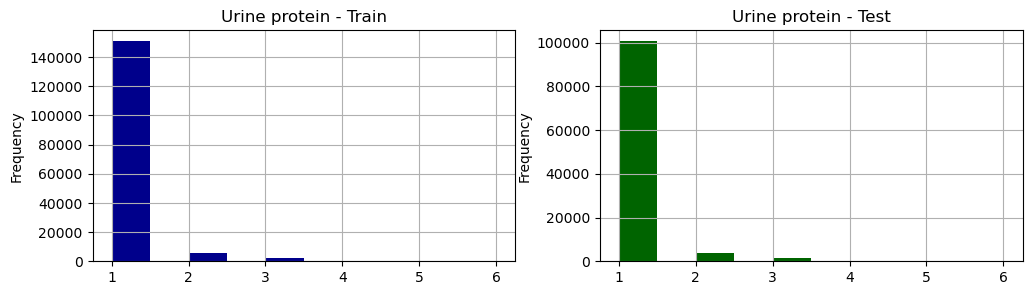

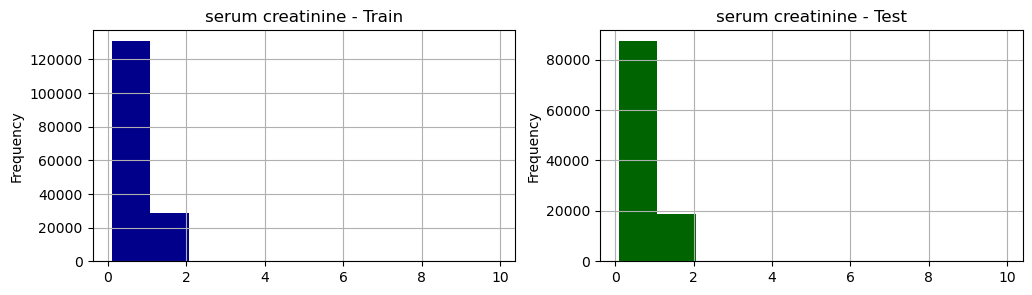

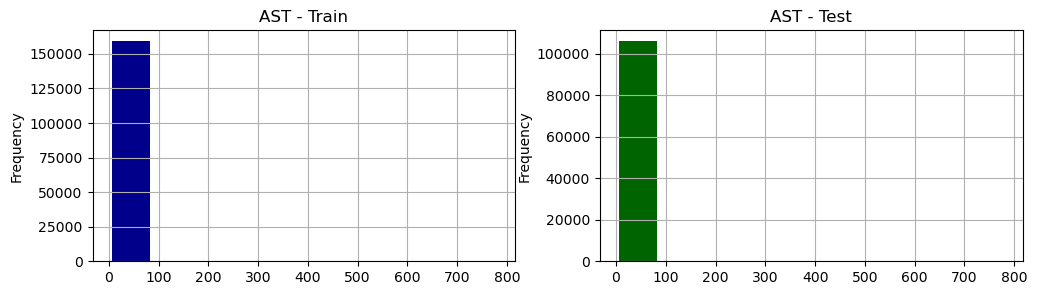

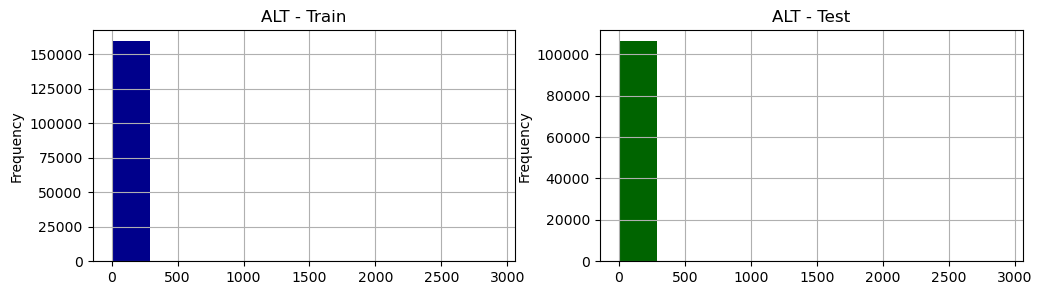

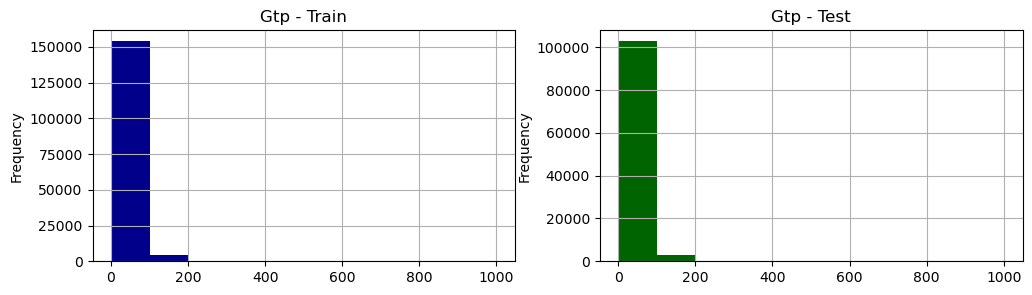

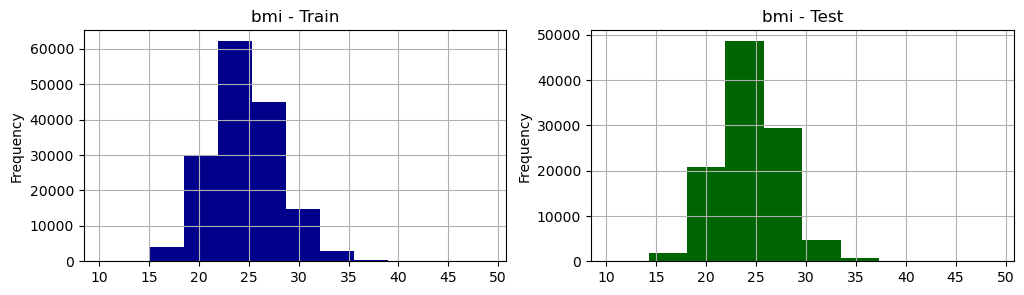

In [24]:
#draw a plot
for f in features_num:
    plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    df_train[f].plot(kind='hist', color='darkblue')
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_test[f].plot(kind='hist', color='darkgreen')
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

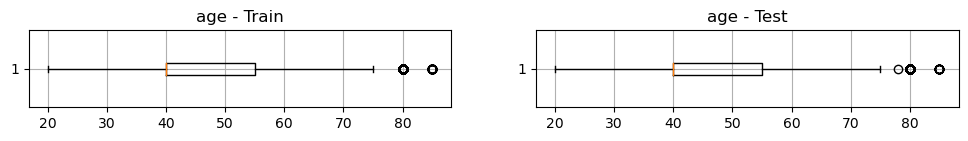

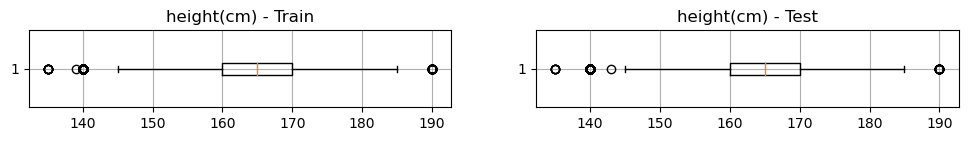

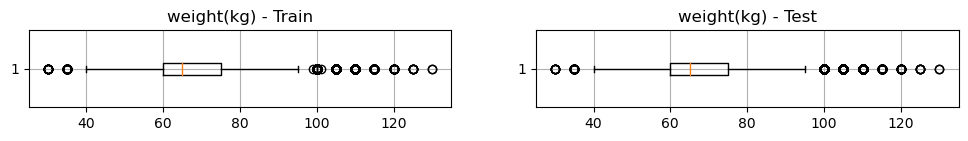

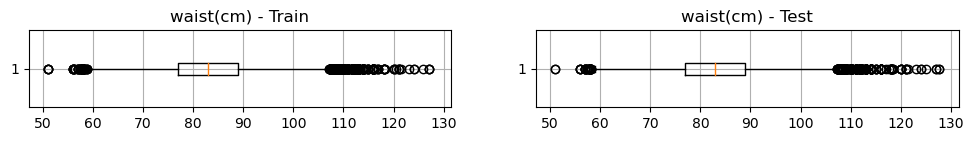

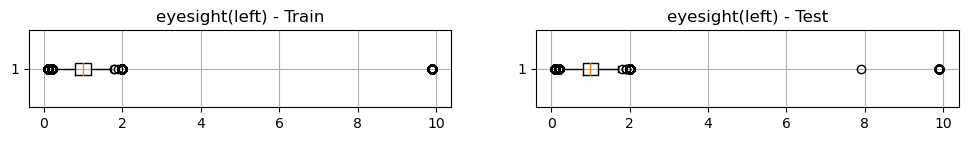

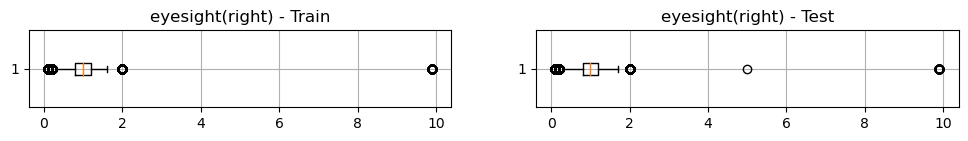

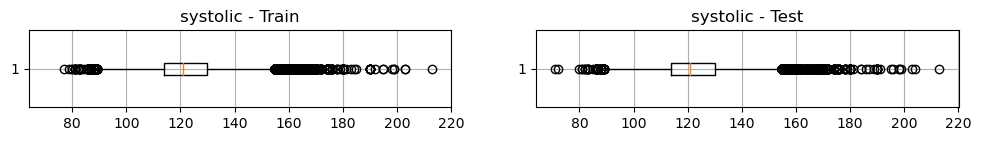

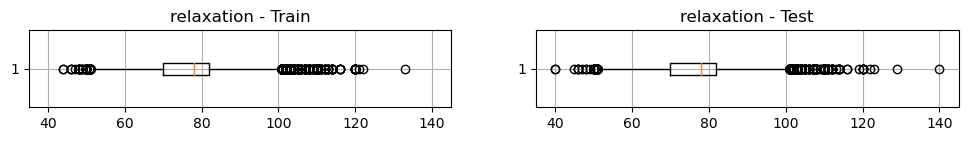

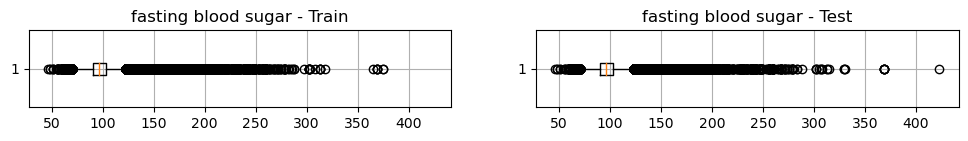

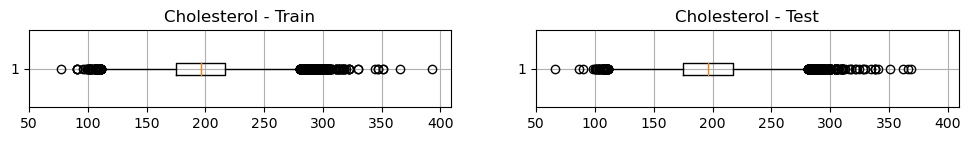

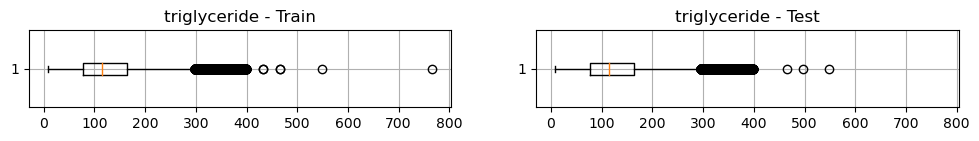

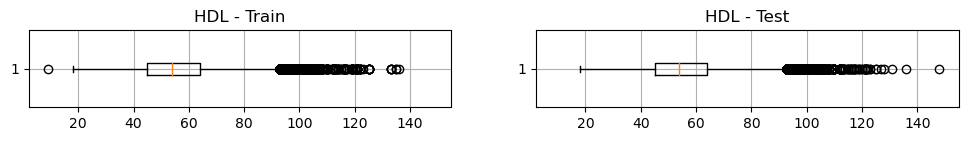

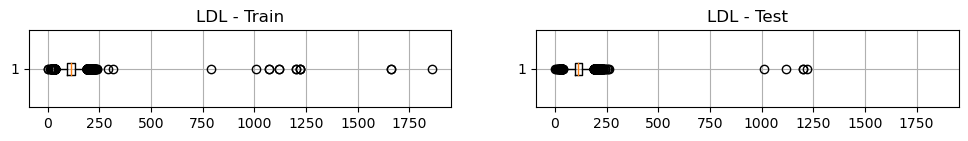

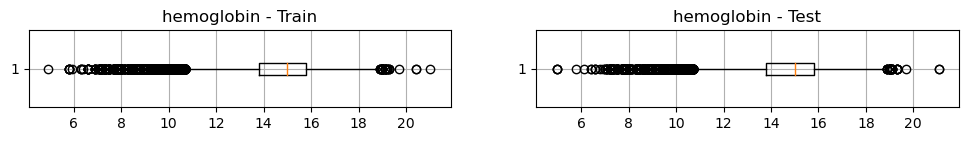

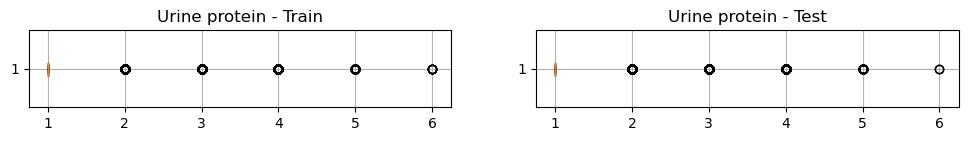

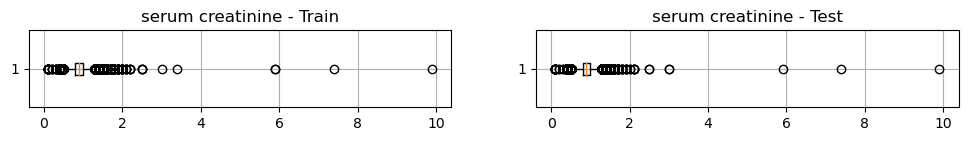

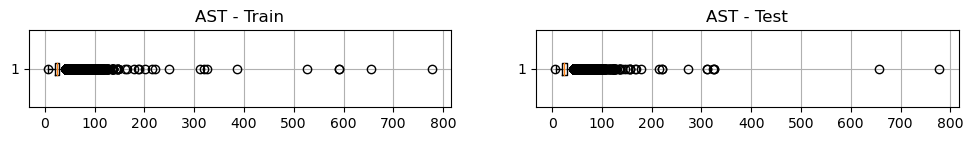

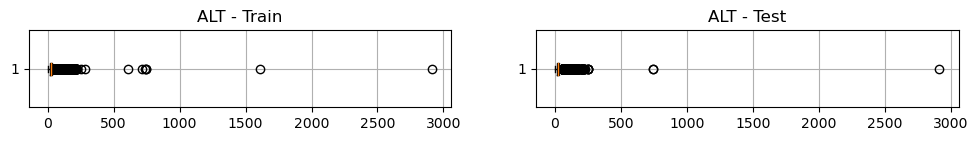

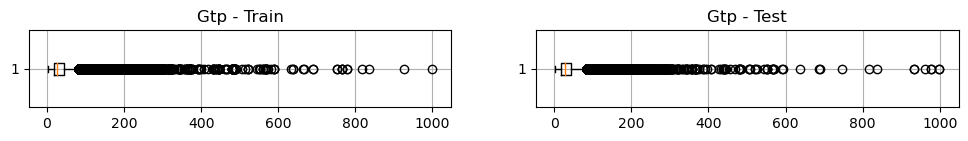

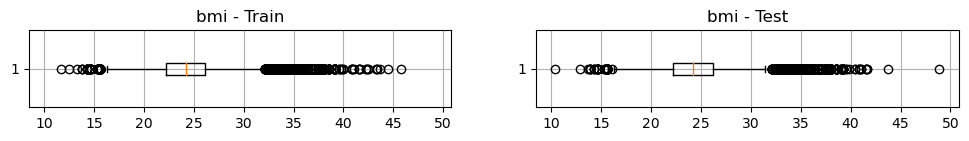

In [25]:
#boxplot
for f in features_num:
    plt.figure(figsize=(12,1))
    ax1 = plt.subplot(1,2,1)
    plt.boxplot(df_train[f], vert=False)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    plt.boxplot(df_test[f], vert=False)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

In [28]:
corr = df_train.corr()
corr.smoking.sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
waist(cm)              0.262715
ALT                    0.163016
bmi                    0.141723
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
AST                    0.059394
systolic               0.058642
id                    -0.000632
Urine protein         -0.028548
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.051896
LDL                   -0.072285
age                   -0.206033
HDL                   -0.271186
Name: smoking, dtype: float64

<Axes: >

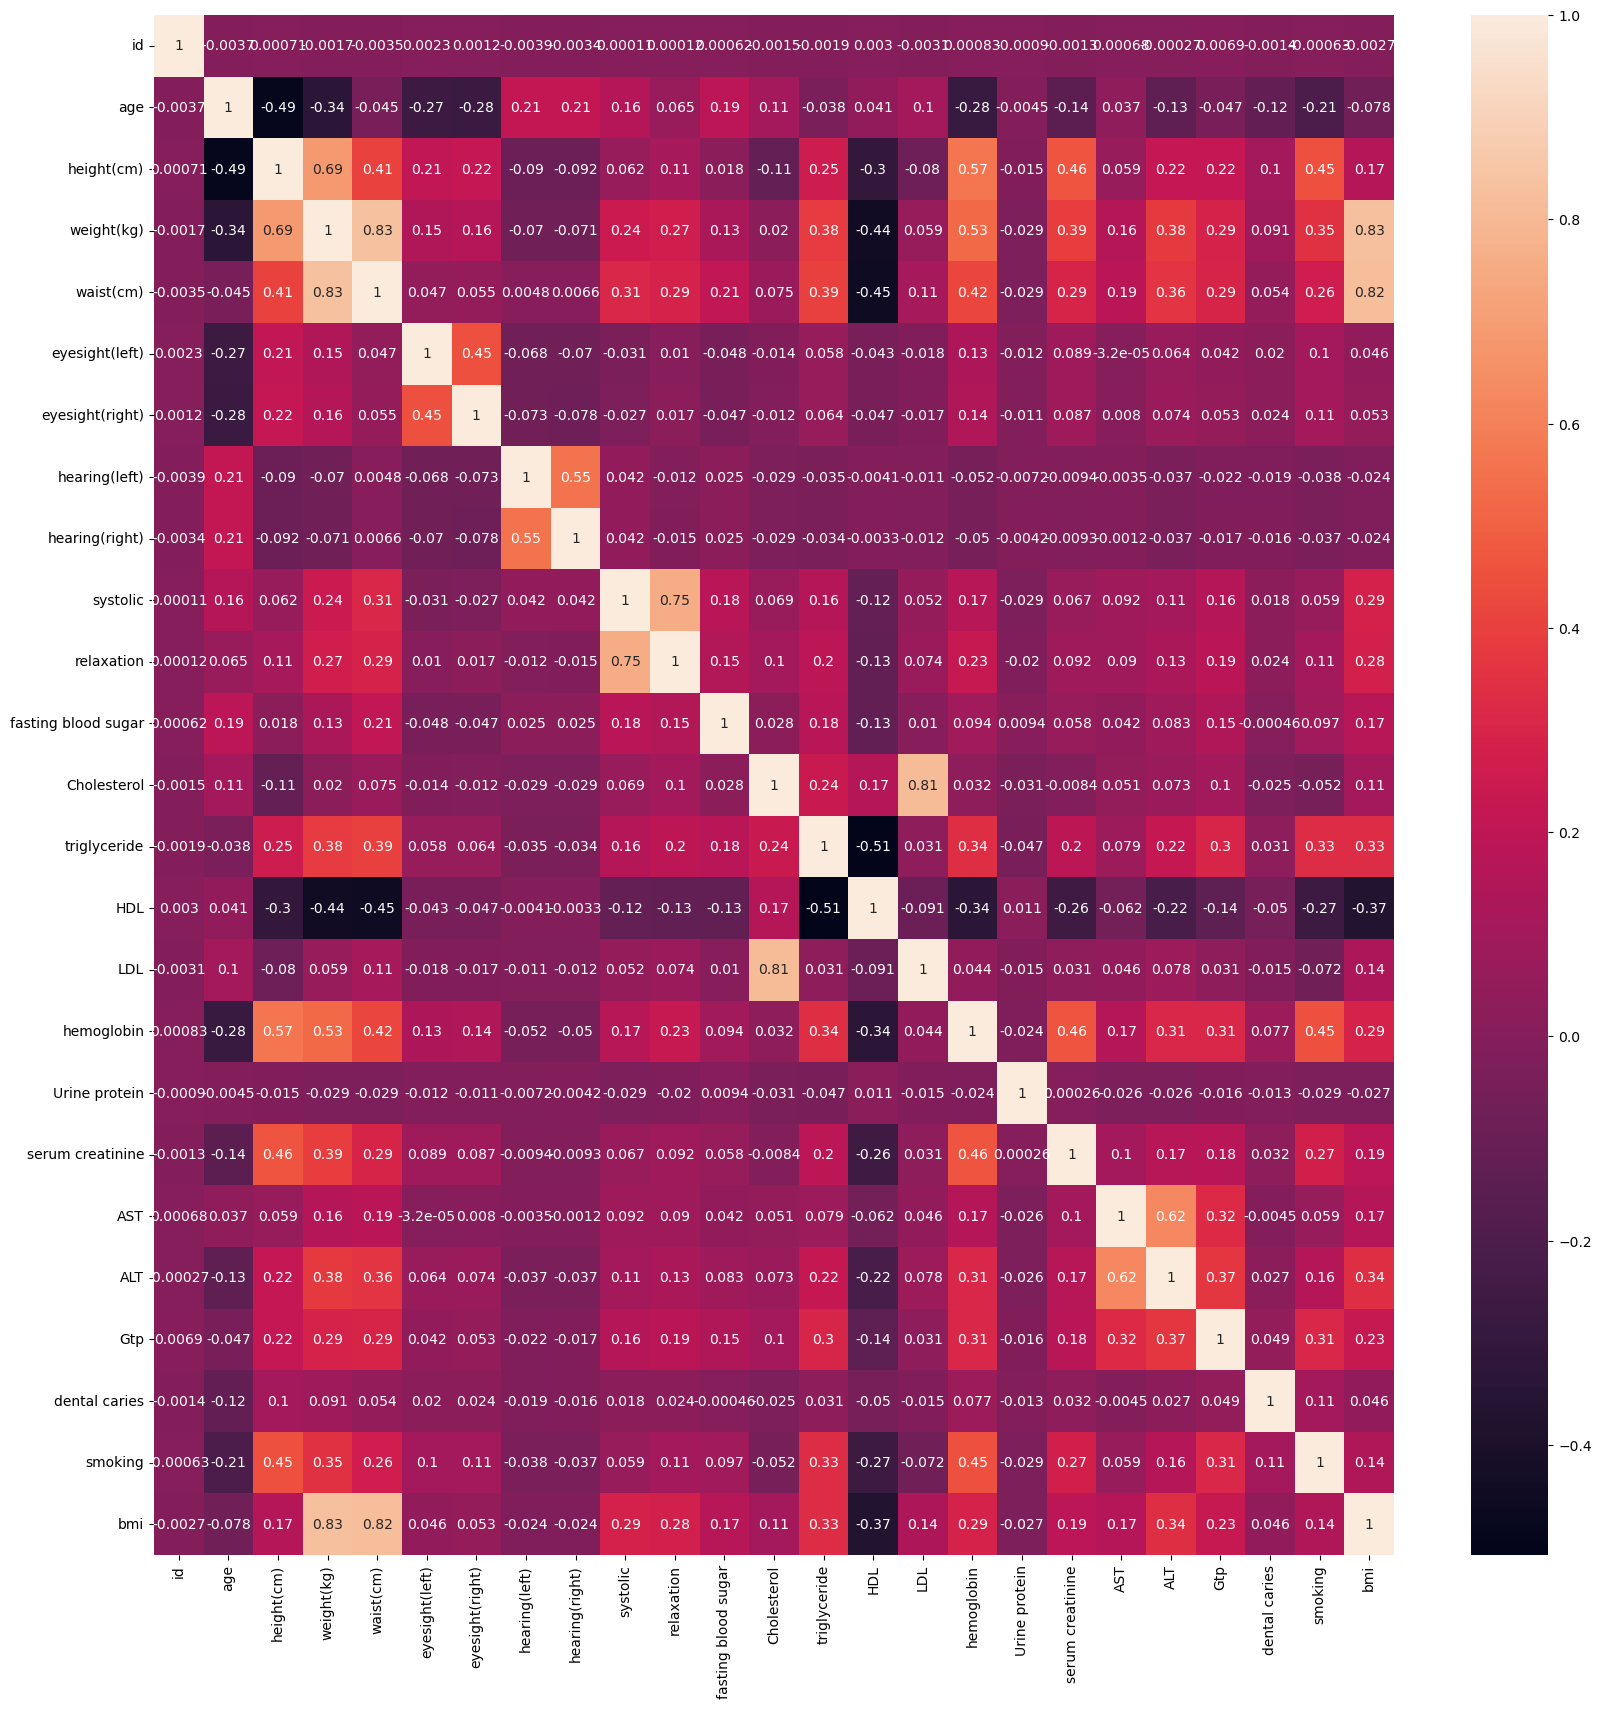

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [32]:
#Train model
x = df_train.drop(['id','smoking'],axis=1)
y = df_train.smoking
print(x)

        age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0        55         165          60       81.0             0.5   
1        70         165          65       89.0             0.6   
2        20         170          75       81.0             0.4   
3        35         180          95      105.0             1.5   
4        30         165          60       80.5             1.5   
...     ...         ...         ...        ...             ...   
159251   40         155          45       69.0             1.5   
159252   50         155          75       82.0             1.0   
159253   40         160          50       66.0             1.5   
159254   50         165          75       92.0             1.2   
159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                   0.6              1               1       135          87   
1                   0.7              2         

In [33]:
print(y)

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64


In [76]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((127404, 23), (127404,), (31852, 23), (31852,))

In [77]:
#generate model to train
model = xgb.XGBClassifier()
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(Xtest)[:,1]
auc = roc_auc_score(Ytest, y_pred_proba)
print("Validation AUC:", auc)

Validation AUC: 0.8617352051175289


In [81]:
Xtest = df_test.drop(['id'], axis=1)

y_pred_proba_test = model.predict_proba(Xtest)[:, 1]

In [82]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [7],
    'min_child_weight': [5],
    'reg_alpha': [1.0],
    'subsample': [1.0]
}

In [86]:

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=3)

grid_search.fit(Xtrain, Ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **grid_search.best_params_)

best_xgb_model.fit(Xtrain, Ytrain)

y_pred = best_xgb_model.predict(Xtest)

submission_df = pd.DataFrame({'id': df_test['id'], 'smoking': y_pred_proba_test})
submission_df.to_csv('submission.csv', index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.866 total time=   1.2s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.863 total time=   1.2s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.865 total time=   1.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.867 total time=   1.2s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.867 total time=   1.2s
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 1.0, 'subs